In [2]:
# The below includes code for Question 2 and some code used for the EDA

In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Users/SubhashPandu/BPA/USAID_GHSC-PSM_Health_Commodity_Delivery_Dataset.csv")

# Display basic information and the first few rows of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


G:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (31,74,75,76,87,88,89,91,92) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42127 entries, 0 to 42126
Columns: 104 entries, ROPOLine to Reason Code Duration
dtypes: float64(23), int64(10), object(71)
memory usage: 33.4+ MB


(None,
                  ROPOLine Task Order Condom Adjusted Task Order     Country  \
 0   RO10021223PO100019151        TO1                        TO1  Mozambique   
 1   RO10060249PO100087742        TO1                        TO1      Zambia   
 2  RO10071106PO1001100012        TO1                        TO1      Zambia   
 3   RO10039248PO100059151        TO1                        TO1      Zambia   
 4   RO10036286PO100045152        TO1                        TO1  Mozambique   
 
     RO Number PO DO IO Number Order Number  Prime Line Number  \
 0  RO10021223      PO10001915   PO10001915                  1   
 1  RO10060249      PO10008774   PO10008774                  2   
 2  RO10071106      PO10011000   PO10011000                 12   
 3  RO10039248      PO10005915   PO10005915                  1   
 4  RO10036286      PO10004515   PO10004515                  2   
 
           Status Name TLP Indicator  ... RO Validation Sourcing and Planning  \
 0  Shipment Delivered          

In [6]:
# Step 1: Identify columns with a high proportion of missing values to consider for removal
missing_data = data.isnull().sum() / len(data) * 100
high_missing_cols = missing_data[missing_data > 50].index.tolist()

# Drop columns with more than 50% missing values
data_cleaned = data.drop(columns=high_missing_cols)

# Step 2: Handle remaining missing values in numeric and categorical columns
# For numeric columns, filling with mean; for categorical, filling with mode
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns

# Fill numeric columns with mean and categorical columns with mode
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Step 3: Convert mixed type columns to appropriate data types (if still any after filling)
# Check for object columns with numbers and try converting them
for col in data_cleaned.select_dtypes(include='object').columns:
    # Attempt to convert to numeric, ignoring errors for non-numeric columns
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='ignore')

# Step 4: Remove duplicates if any
data_cleaned = data_cleaned.drop_duplicates()

# Step 5: Standardize categorical values - converting all strings to lowercase to ensure uniformity
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].apply(lambda x: x.str.lower())

# Summary of the cleaned dataset
cleaned_info = data_cleaned.info()
missing_after_cleaning = data_cleaned.isnull().sum().sum()  # Check if any missing data remains

cleaned_info, missing_after_cleaning


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42127 entries, 0 to 42126
Data columns (total 95 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ROPOLine                                              42127 non-null  object 
 1   Task Order                                            42127 non-null  object 
 2   Condom Adjusted Task Order                            42127 non-null  object 
 3   Country                                               42127 non-null  object 
 4   RO Number                                             42127 non-null  object 
 5   PO DO IO Number                                       42127 non-null  object 
 6   Order Number                                          42127 non-null  object 
 7   Prime Line Number                                     42127 non-null  int64  
 8   Status Name                                           42

(None, 0)

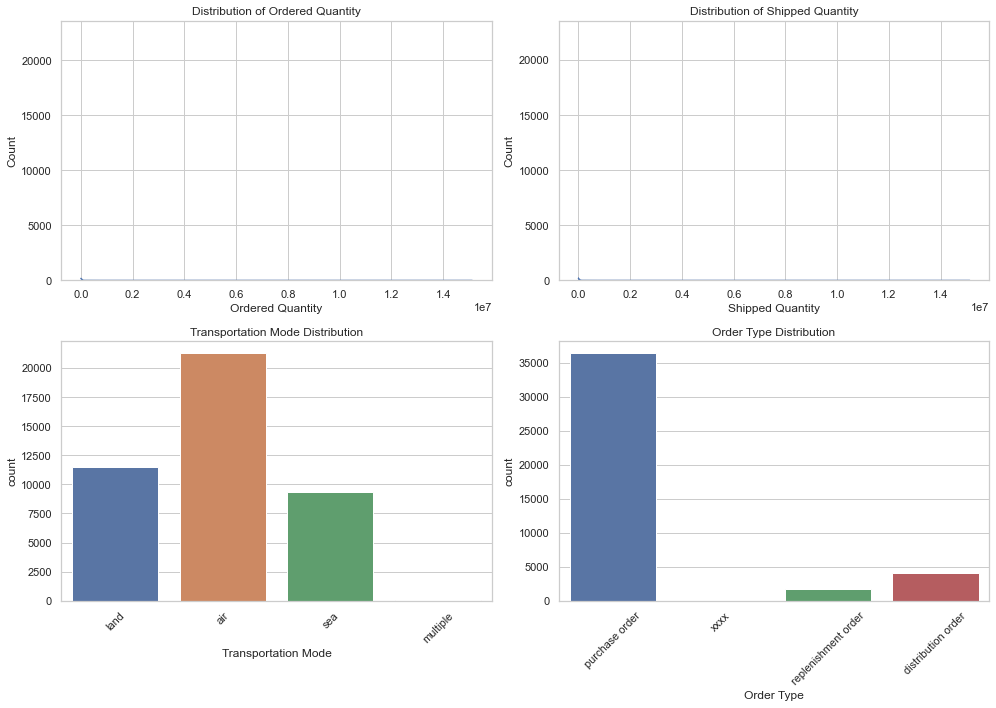

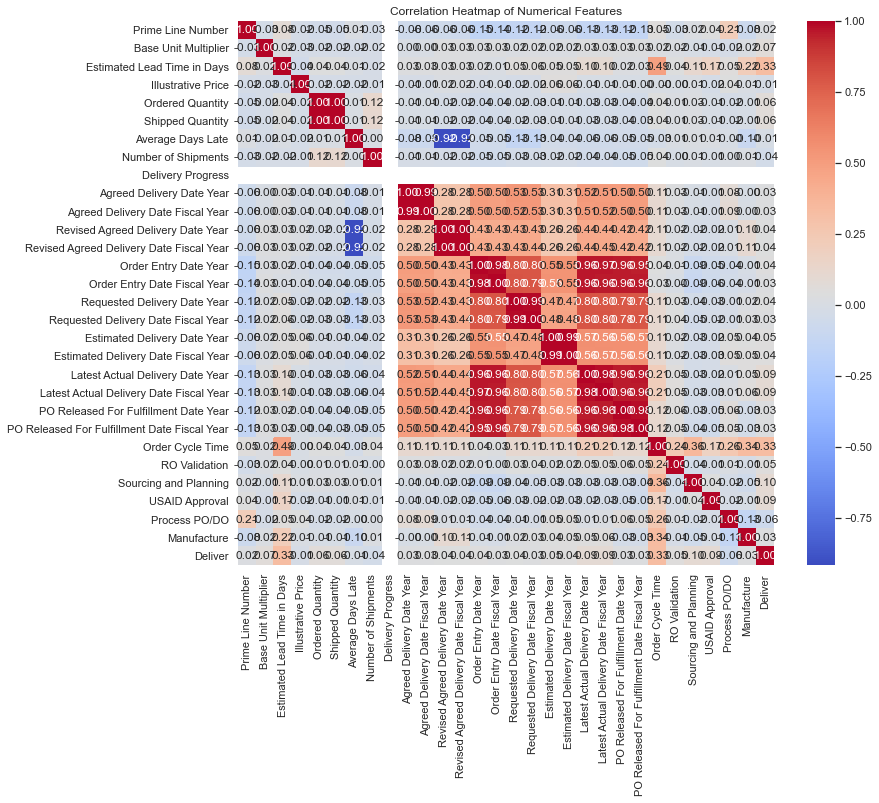

,Prime Line Number,Base Unit Multiplier,Estimated Lead Time in Days,Illustrative Price,Ordered Quantity,Shipped Quantity,Average Days Late,Number of Shipments,Delivery Progress,Agreed Delivery Date Year,...,Latest Actual Delivery Date Fiscal Year,PO Released For Fulfillment Date Year,PO Released For Fulfillment Date Fiscal Year,Order Cycle Time,RO Validation,Sourcing and Planning,USAID Approval,Process PO/DO,Manufacture,Deliver
count,42127.000000,42127.000000,42127.000000,42127.000000,4.212700e+04,4.212700e+04,42127.000000,42127.000000,42127.0,42127.000000,...,42127.000000,42127.000000,42127.000000,42127.000000,42127.000000,42127.000000,42127.000000,42127.000000,42127.000000,42127.000000
mean,4.866570,241.550388,161.939125,519.917037,3.848943e+04,3.841592e+04,-96.506325,1.089301,2.0,2020.173976,...,2020.282669,2019.774069,2020.007159,240.300282,23.529758,60.772304,4.293641,55.640946,72.003269,39.667488
std,8.667694,689.398310,72.226403,4619.057985,2.294981e+05,2.292837e+05,1731.840182,0.625732,0.0,3.975380,...,2.089883,2.004198,2.024542,133.656808,32.276007,44.225759,14.655681,65.618712,69.383929,35.523944
min,1.000000,0.500000,0.000000,0.010000,0.000000e+00,0.000000e+00,-56943.000000,1.000000,2.0,2015.000000,...,2016.000000,2016.000000,2016.000000,-335.000000,-401.000000,-190.000000,-146.000000,-9.000000,-458.000000,-404.000000
25%,1.000000,1.000000,119.000000,6.540000,2.700000e+01,2.700000e+01,-1.000000,1.000000,2.0,2018.000000,...,2018.000000,2018.000000,2018.000000,147.000000,8.000000,40.000000,0.000000,17.000000,26.000000,14.000000
50%,2.000000,25.000000,161.939125,32.000000,2.570000e+02,2.560000e+02,0.000000,1.000000,2.0,2020.000000,...,2020.000000,2020.000000,2020.000000,220.000000,23.529758,60.772304,1.000000,36.000000,72.003269,39.667488
75%,5.000000,100.000000,175.000000,160.000000,6.170000e+03,6.167500e+03,5.000000,1.000000,2.0,2022.000000,...,2022.000000,2021.000000,2022.000000,315.000000,23.529758,60.772304,4.293641,66.000000,82.000000,39.667488
max,124.000000,20000.000000,1260.000000,195500.000000,1.512000e+07,1.512000e+07,765.000000,32.000000,2.0,2108.000000,...,2024.000000,2024.000000,2024.000000,1164.000000,638.000000,581.000000,303.000000,775.000000,753.000000,639.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
sns.set(style="whitegrid")

# Step 1: Summary statistics of numerical columns
numeric_summary = data_cleaned.describe()

# Step 2: Distribution of a few key variables for EDA
# Selecting a few columns that might be insightful for initial EDA
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of 'Ordered Quantity'
sns.histplot(data_cleaned['Ordered Quantity'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Ordered Quantity')

# Distribution of 'Shipped Quantity'
sns.histplot(data_cleaned['Shipped Quantity'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Shipped Quantity')

# Countplot for 'Transportation Mode' - one of the key categorical features
sns.countplot(data=data_cleaned, x='Transportation Mode', ax=axs[1, 0])
axs[1, 0].set_title('Transportation Mode Distribution')
axs[1, 0].tick_params(axis='x', rotation=45)

# Countplot for 'Order Type' - another key categorical feature
sns.countplot(data=data_cleaned, x='Order Type', ax=axs[1, 1])
axs[1, 1].set_title('Order Type Distribution')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Step 3: Correlation analysis to identify relationships between numeric features
correlation_matrix = data_cleaned[numeric_cols].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

numeric_summary


In [8]:
# Step 1: Data Preparation - Extracting and engineering relevant features

# Check if necessary columns exist for calculations
columns_needed = ['Order Date', 'Delivery Date', 'Ordered Quantity', 'Shipped Quantity', 'Unit Price']
existing_columns = [col for col in columns_needed if col in data_cleaned.columns]

# Proceed only if the required columns are present
if set(columns_needed).issubset(data_cleaned.columns):
    # Convert 'Order Date' and 'Delivery Date' to datetime format for calculating delivery time
    data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date'], errors='coerce')
    data_cleaned['Delivery Date'] = pd.to_datetime(data_cleaned['Delivery Date'], errors='coerce')

    # Calculate Delivery Time (in days)
    data_cleaned['Delivery Time'] = (data_cleaned['Delivery Date'] - data_cleaned['Order Date']).dt.days

    # Calculate Shipment Fulfillment Ratio
    data_cleaned['Shipment Fulfillment Ratio'] = data_cleaned['Shipped Quantity'] / data_cleaned['Ordered Quantity']

    # Calculate Revenue if 'Unit Price' is available
    if 'Unit Price' in data_cleaned.columns:
        data_cleaned['Revenue'] = data_cleaned['Shipped Quantity'] * data_cleaned['Unit Price']
    else:
        data_cleaned['Revenue'] = None  # Placeholder if Unit Price is missing

    # Drop rows where essential calculated columns have NaN values after processing
    data_filtered = data_cleaned.dropna(subset=['Delivery Time', 'Shipment Fulfillment Ratio', 'Shipped Quantity', 'Revenue'])

    # Display first few rows of the prepared data to confirm
    data_filtered.head()

else:
    # Placeholder message if required columns are missing
    "Required columns for this analysis are missing in the dataset."


In [9]:
# Repeat data cleaning steps to prepare for modeling
# Step 1: Identify columns with a high proportion of missing values to consider for removal
missing_data = data.isnull().sum() / len(data) * 100
high_missing_cols = missing_data[missing_data > 50].index.tolist()

# Drop columns with more than 50% missing values
data_cleaned = data.drop(columns=high_missing_cols)

# Step 2: Handle remaining missing values in numeric and categorical columns
# For numeric columns, filling with mean; for categorical, filling with mode
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns

# Fill numeric columns with mean and categorical columns with mode
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Step 3: Convert mixed type columns to appropriate data types
for col in data_cleaned.select_dtypes(include='object').columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='ignore')

# Step 4: Remove duplicates if any
data_cleaned = data_cleaned.drop_duplicates()

# Standardize categorical values
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].apply(lambda x: x.str.lower())

# Proceed with machine learning model setup
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target for the model
features = [
    "Estimated Lead Time in Days", "Average Days Late", "Order Cycle Time",
    "Shipped Quantity", "Number of Shipments", "Delivery Progress"
]
target = "Ordered Quantity"

# Filter data to remove zero quantities in target and rows with any missing features
data_filtered = data_cleaned[(data_cleaned[target] > 0) & (data_cleaned[features].notnull().all(axis=1))]

# Define feature set and target variable
X = data_filtered[features]
y = data_filtered[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(3014956785.805548, 0.9486831646137969)



# "QUESTION - 2" 



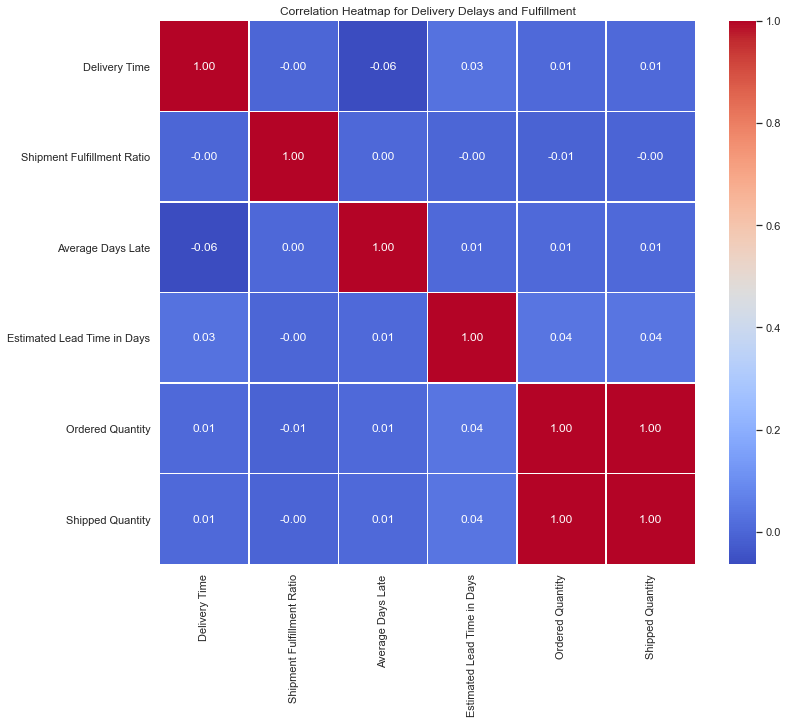

G:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


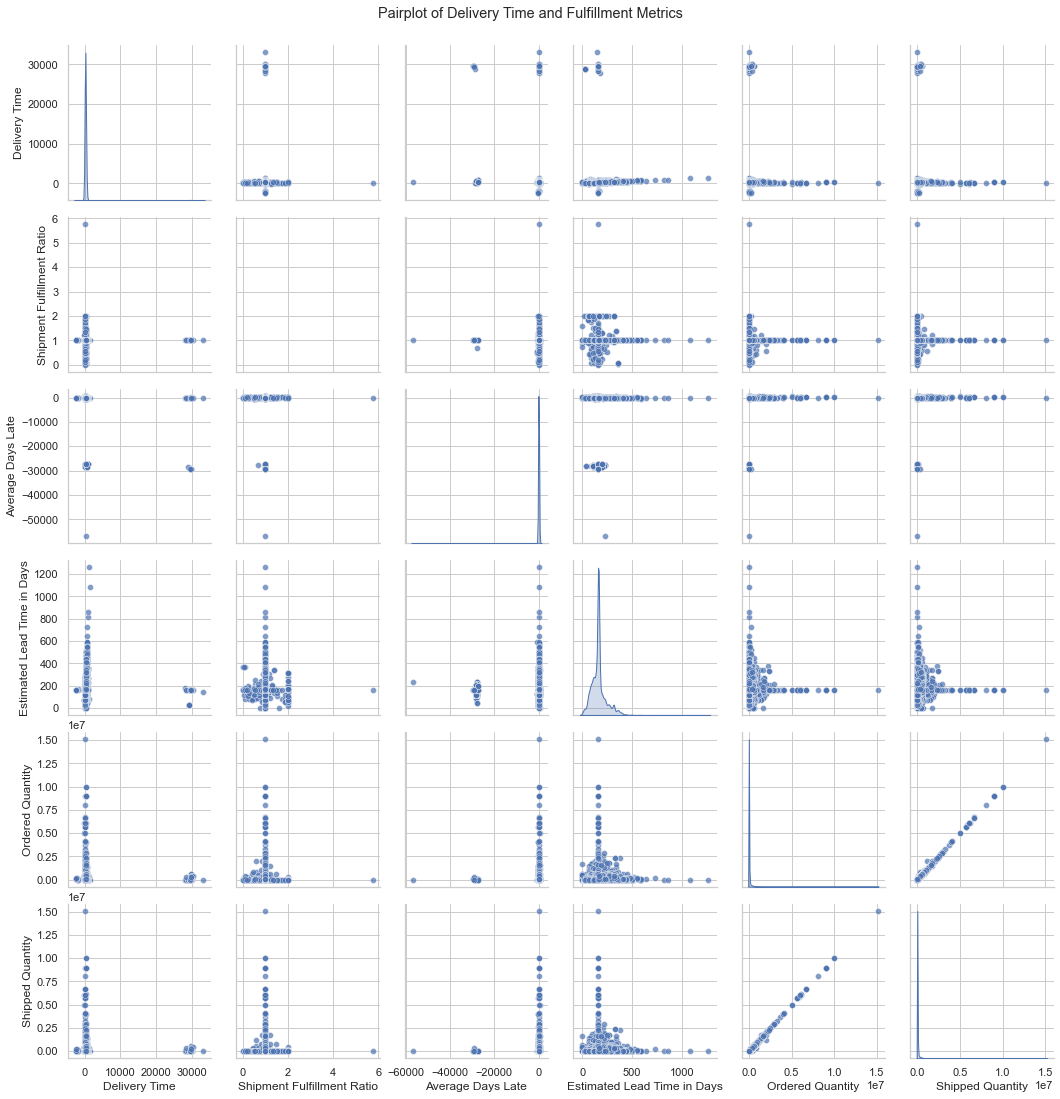

Variables most correlated with Delivery Time:
Delivery Time                  1.000000
Estimated Lead Time in Days    0.031412
Shipped Quantity               0.008437
Ordered Quantity               0.008392
Shipment Fulfillment Ratio    -0.000073
Average Days Late             -0.063410
Name: Delivery Time, dtype: float64

Variables most correlated with Shipment Fulfillment Ratio:
Shipment Fulfillment Ratio     1.000000
Average Days Late              0.003090
Delivery Time                 -0.000073
Estimated Lead Time in Days   -0.000650
Shipped Quantity              -0.003134
Ordered Quantity              -0.007497
Name: Shipment Fulfillment Ratio, dtype: float64


In [10]:
#EXPLORATORY DATA ANALYSIS FOR QUESTION - 2

import seaborn as sns
import matplotlib.pyplot as plt

# Step 0 Calculate 'Delivery Time' and 'Shipment Fulfillment Ratio' as before
data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Entry Date'], errors='coerce')
data_cleaned['Delivery Date'] = pd.to_datetime(data_cleaned['Agreed Delivery Date'], errors='coerce')

# Calculate Delivery Time (in days)
data_cleaned['Delivery Time'] = (data_cleaned['Delivery Date'] - data_cleaned['Order Date']).dt.days

# Calculate Shipment Fulfillment Ratio
data_cleaned['Shipment Fulfillment Ratio'] = data_cleaned['Shipped Quantity'] / data_cleaned['Ordered Quantity']

# Step 1: Identify relevant columns related to delays and fulfillment
delay_fulfillment_cols = [
    'Delivery Time', 'Shipment Fulfillment Ratio', 'Average Days Late', 'On Time (OTD)', 'In Full (IFD)', 
    'Estimated Lead Time in Days', 'Ordered Quantity', 'Shipped Quantity'
]

# Step 2: Calculate the correlation matrix for relevant variables
correlation_matrix = data_cleaned[delay_fulfillment_cols].corr()

# Step 3: Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Delivery Delays and Fulfillment")
plt.show()

# Step 4: Create pairplots to visualize relationships between variables (optional but insightful)
sns.pairplot(data_cleaned[delay_fulfillment_cols], kind="scatter", diag_kind="kde", plot_kws={'alpha':0.7})
plt.suptitle("Pairplot of Delivery Time and Fulfillment Metrics", y=1.02)
plt.show()

# Step 5: Investigate specific relationships - Correlations with 'Delivery Time' and 'Shipment Fulfillment Ratio'
correlation_with_delivery_time = correlation_matrix['Delivery Time'].sort_values(ascending=False)
correlation_with_fulfillment_ratio = correlation_matrix['Shipment Fulfillment Ratio'].sort_values(ascending=False)

# Display the results for the variables most correlated with delays and fulfillment
print("Variables most correlated with Delivery Time:")
print(correlation_with_delivery_time)

print("\nVariables most correlated with Shipment Fulfillment Ratio:")
print(correlation_with_fulfillment_ratio)


### Relevant Columns for Delay and Fulfillment Analysis:
1. **Delay-related variables**:
   - `'Average Days Late'`: This represents how much later shipments are from their agreed-upon delivery date.
   - `'Delivery Progress'`: This could indicate how far along the delivery process is, which could correlate with delays.

2. **Fulfillment-related variables**:
   - `'Shipment Fulfillment Ratio'`: This indicates the proportion of the ordered quantity that was shipped.
   - `'In Full (IFD)'`: Indicates if the delivery was made in full.
   - `'On Time (OTD)'`: Indicates if the delivery was made on time.

3. **Time-related columns**:
   - `'Estimated Lead Time in Days'`: The estimated time it takes to deliver the order.
   - `'Ordered Quantity'` and `'Shipped Quantity'`: These could relate to the fulfillment rate.
   - `'Order Cycle Time'`: The time it takes to complete an order cycle, which might have an impact on delays.

### Steps to Conduct the Analysis:
1. **Select the relevant columns** for delay and fulfillment analysis.
2. **Calculate the correlation matrix** between these selected columns.
3. **Visualize** the correlations using a heatmap.
4. Identify the **most and least correlated variables** with delivery delays and fulfillment.

### Explanation:
- **Step 1**: The relevant columns like `'Average Days Late'`, `'Delivery Progress'`, `'Shipment Fulfillment Ratio'`, and others are listed in `delay_fulfillment_cols`.
- **Step 2**: A correlation matrix is calculated for the selected columns using `.corr()`.
- **Step 3**: A heatmap is plotted using `seaborn` to visualize the correlation between the selected columns.
- **Step 4**: The correlations with `Average Days Late` (which represents delays) and `Shipment Fulfillment Ratio` (which is directly related to fulfillment) are printed for further analysis.

### Expected Outcomes:
- **Heatmap**: The heatmap will visually show the relationships between various variables, highlighting strong or weak correlations.
- **Correlation Values**: The printed results will show the variables most correlated with delays (`Average Days Late`) and fulfillment (`Shipment Fulfillment Ratio`), helping you identify factors that most affect delivery performance.


In [11]:
# Display column names and the first few rows of the dataset
print("Columns and First Few Rows of Data:")
print(data.head())

Columns and First Few Rows of Data:
                 ROPOLine Task Order Condom Adjusted Task Order     Country  \
0   RO10021223PO100019151        TO1                        TO1  Mozambique   
1   RO10060249PO100087742        TO1                        TO1      Zambia   
2  RO10071106PO1001100012        TO1                        TO1      Zambia   
3   RO10039248PO100059151        TO1                        TO1      Zambia   
4   RO10036286PO100045152        TO1                        TO1  Mozambique   

    RO Number PO DO IO Number Order Number  Prime Line Number  \
0  RO10021223      PO10001915   PO10001915                  1   
1  RO10060249      PO10008774   PO10008774                  2   
2  RO10071106      PO10011000   PO10011000                 12   
3  RO10039248      PO10005915   PO10005915                  1   
4  RO10036286      PO10004515   PO10004515                  2   

          Status Name TLP Indicator  ... RO Validation Sourcing and Planning  \
0  Shipment Delive

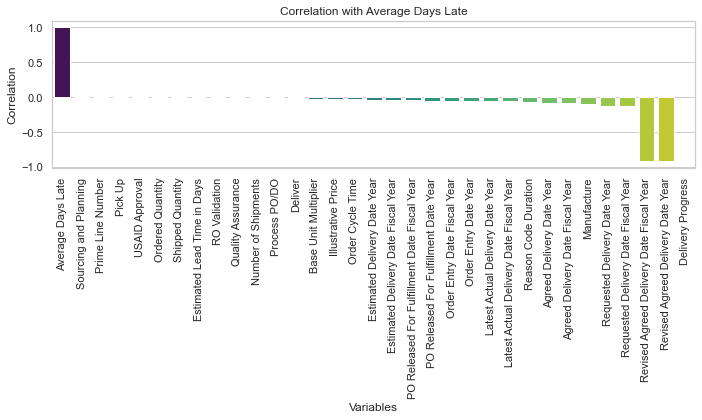

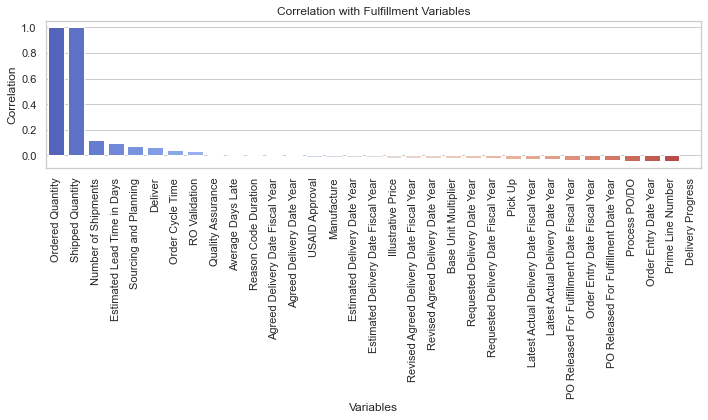

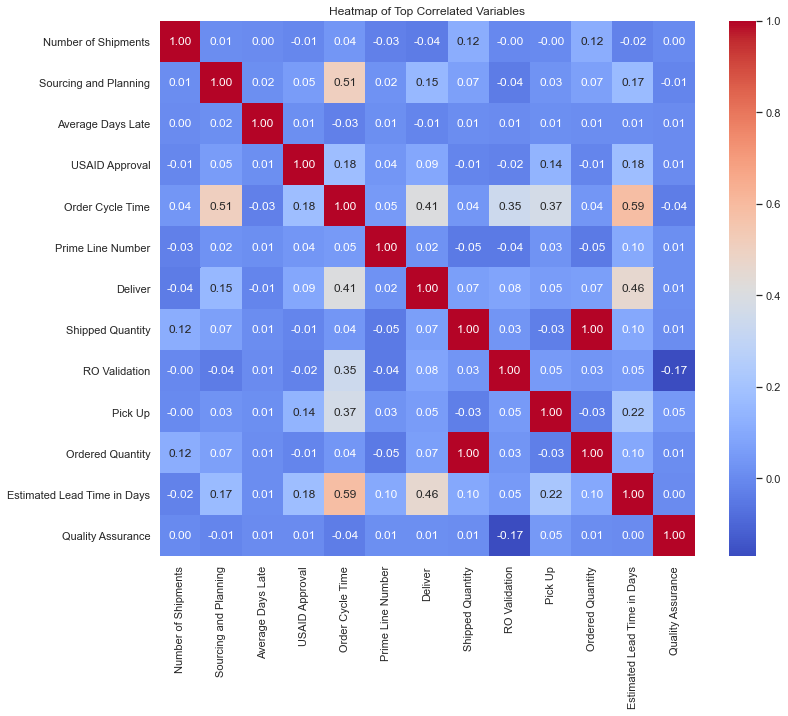

In [12]:
delay_variable = 'Average Days Late' 
fulfillment_variable = ['Ordered Quantity', 'Shipped Quantity']

# Calculate correlation with delay
correlation_with_delay = data.corr()[delay_variable].sort_values(ascending=False)

# Calculate average correlation with fulfillment
fulfillment_corr = data.corr()[fulfillment_variable].mean(axis=1).sort_values(ascending=False)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for delay correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_delay.index, y=correlation_with_delay.values, palette="viridis")
plt.xticks(rotation=90)
plt.title(f"Correlation with {delay_variable}")
plt.ylabel("Correlation")
plt.xlabel("Variables")
plt.tight_layout()
plt.show()

# Bar plot for fulfillment correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=fulfillment_corr.index, y=fulfillment_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlation with Fulfillment Variables")
plt.ylabel("Correlation")
plt.xlabel("Variables")
plt.tight_layout()
plt.show()


# Heatmap of correlations for a subset of highly correlated variables
top_corr_vars = correlation_with_delay.index[:10].tolist() + fulfillment_corr.index[:10].tolist()
top_corr_vars = list(set(top_corr_vars))  # Remove duplicates
subset_corr = data[top_corr_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(subset_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap of Top Correlated Variables")
plt.tight_layout()
plt.show()


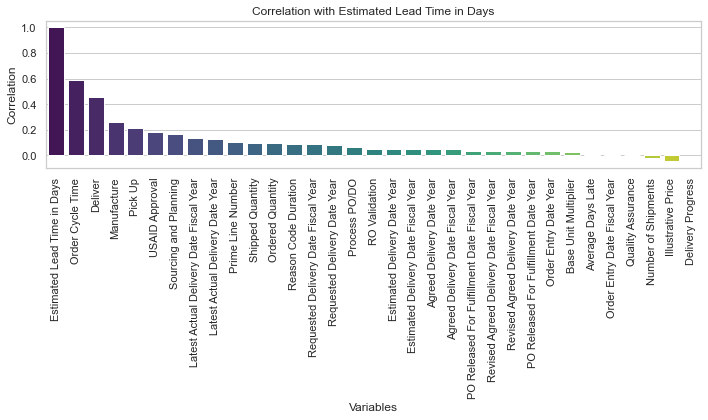

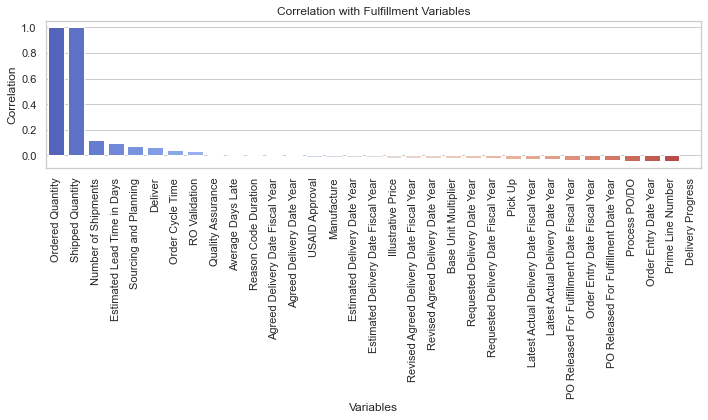

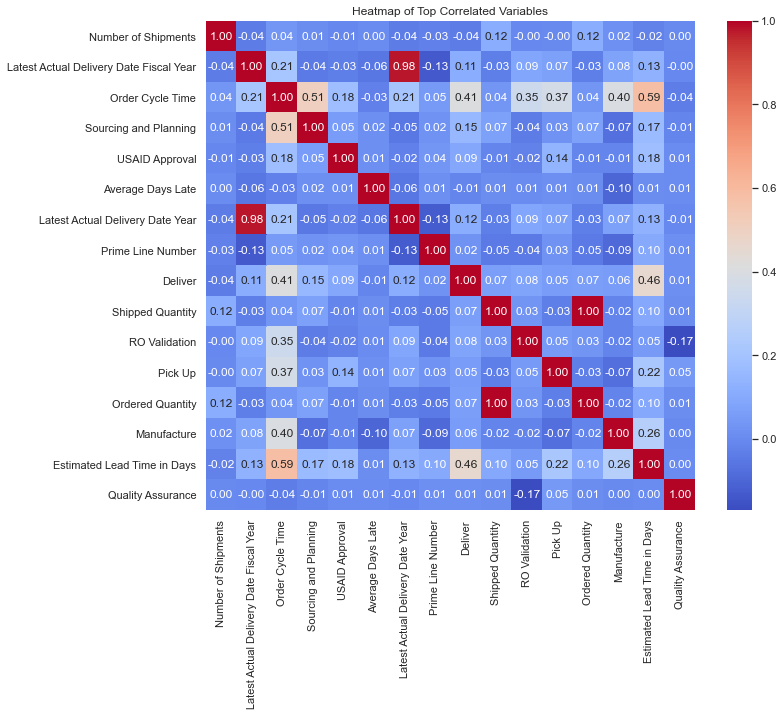

In [13]:
delay_variable = 'Estimated Lead Time in Days'  # or 'Average Days Late', depending on your analysis goal
fulfillment_variable = ['Ordered Quantity', 'Shipped Quantity']

# Calculate correlation with delay
correlation_with_delay = data.corr()[delay_variable].sort_values(ascending=False)

# Calculate average correlation with fulfillment
fulfillment_corr = data.corr()[fulfillment_variable].mean(axis=1).sort_values(ascending=False)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for delay correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_delay.index, y=correlation_with_delay.values, palette="viridis")
plt.xticks(rotation=90)
plt.title(f"Correlation with {delay_variable}")
plt.ylabel("Correlation")
plt.xlabel("Variables")
plt.tight_layout()
plt.show()

# Bar plot for fulfillment correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=fulfillment_corr.index, y=fulfillment_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlation with Fulfillment Variables")
plt.ylabel("Correlation")
plt.xlabel("Variables")
plt.tight_layout()
plt.show()


# Heatmap of correlations for a subset of highly correlated variables
top_corr_vars = correlation_with_delay.index[:10].tolist() + fulfillment_corr.index[:10].tolist()
top_corr_vars = list(set(top_corr_vars))  # Remove duplicates
subset_corr = data[top_corr_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(subset_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap of Top Correlated Variables")
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import numpy as np

# Replace NaN values in numeric columns with the mean of each column
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()))

# Verify NaN values are replaced
print(data.isnull().sum())

ROPOLine                          0
Task Order                        0
Condom Adjusted Task Order        0
Country                           0
RO Number                         0
                              ...  
Pick Up                           0
Deliver                           0
Quality Assurance                 0
Reason Code                   14282
Reason Code Duration              0
Length: 104, dtype: int64


In [15]:
print(data_cleaned.columns)

Index(['ROPOLine', 'Task Order', 'Condom Adjusted Task Order', 'Country',
       'RO Number', 'PO DO IO Number', 'Order Number', 'Prime Line Number',
       'Status Name', 'TLP Indicator', 'Order Type', 'Fulfillment Method',
       'Transportation Mode', 'Item Tracer Category', 'Product Category',
       'Product ID', 'Product_Name', 'UOM', 'Base Unit',
       'Base Unit Multiplier', 'Framework Contract', 'D365 Health Element',
       'D365 Funding Source', 'D365 Funding Source Detail',
       'Fiscal_Year_Funding', 'Estimated Lead Time in Days', 'Vendor Incoterm',
       'Destination Incoterm', 'Illustrative Price', 'Ordered Quantity',
       'Shipped Quantity', 'In Full (IFD)', 'On Time (OTD)',
       'Between -14 and 14', 'Between -30 and 30', 'OTIF Categories',
       'OTIF Between -14 and 14', 'OTIF Between -30 and 30',
       'Average Days Late', 'Number of Shipments', 'Delivery Progress',
       'Line Delivery Status', 'Agreed Delivery Date',
       'Agreed Delivery Date Year', 

In [16]:
# Calculate the Shipment Fulfillment Ratio
data_cleaned['Shipment Fulfillment Ratio'] = data_cleaned['Shipped Quantity'] / data_cleaned['Ordered Quantity']

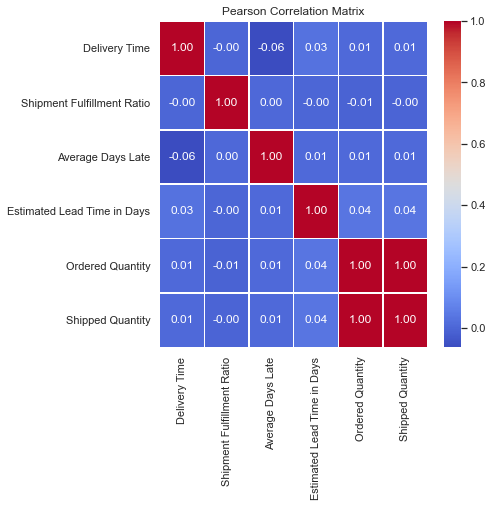

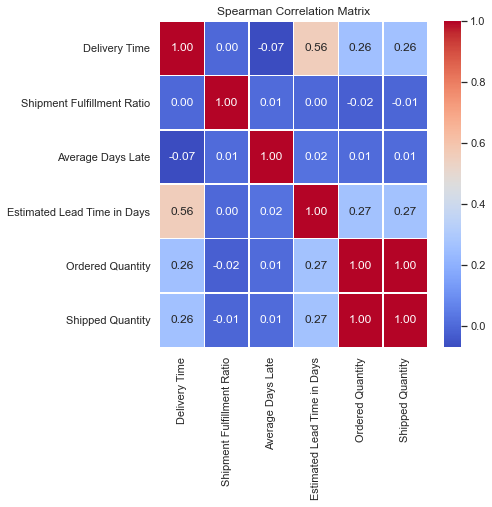

Pearson correlation with Average Days Late:
Average Days Late              1.000000
Ordered Quantity               0.010213
Shipped Quantity               0.010185
Estimated Lead Time in Days    0.008193
Shipment Fulfillment Ratio     0.003090
Delivery Time                 -0.063410
Name: Average Days Late, dtype: float64

Spearman correlation with Average Days Late:
Average Days Late              1.000000
Estimated Lead Time in Days    0.024031
Shipped Quantity               0.010567
Ordered Quantity               0.010239
Shipment Fulfillment Ratio     0.009296
Delivery Time                 -0.068626
Name: Average Days Late, dtype: float64

Pearson correlation with Shipment Fulfillment Ratio:
Shipment Fulfillment Ratio     1.000000
Average Days Late              0.003090
Delivery Time                 -0.000073
Estimated Lead Time in Days   -0.000650
Shipped Quantity              -0.003134
Ordered Quantity              -0.007497
Name: Shipment Fulfillment Ratio, dtype: float64

Spearm

In [17]:
# Step 2: Filter numeric columns explicitly before calculating correlations
numeric_data = data_cleaned[delay_fulfillment_cols].select_dtypes(include=['number'])

# Calculate the Pearson correlation matrix (linear correlation)
pearson_corr = numeric_data.corr(method='pearson')

# Calculate the Spearman correlation matrix (monotonic correlation)
spearman_corr = numeric_data.corr(method='spearman')

# Step 4: Plot Pearson correlation heatmap
plt.figure(figsize=(6,6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Matrix")
plt.show()

# Step 5: Plot Spearman correlation heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Matrix")
plt.show()

# Optional: Print the correlations with specific metrics
if 'Average Days Late' in pearson_corr.columns:
    print("Pearson correlation with Average Days Late:")
    print(pearson_corr['Average Days Late'].sort_values(ascending=False))

    print("\nSpearman correlation with Average Days Late:")
    print(spearman_corr['Average Days Late'].sort_values(ascending=False))

if 'Shipment Fulfillment Ratio' in pearson_corr.columns:
    print("\nPearson correlation with Shipment Fulfillment Ratio:")
    print(pearson_corr['Shipment Fulfillment Ratio'].sort_values(ascending=False))

    print("\nSpearman correlation with Shipment Fulfillment Ratio:")
    print(spearman_corr['Shipment Fulfillment Ratio'].sort_values(ascending=False))


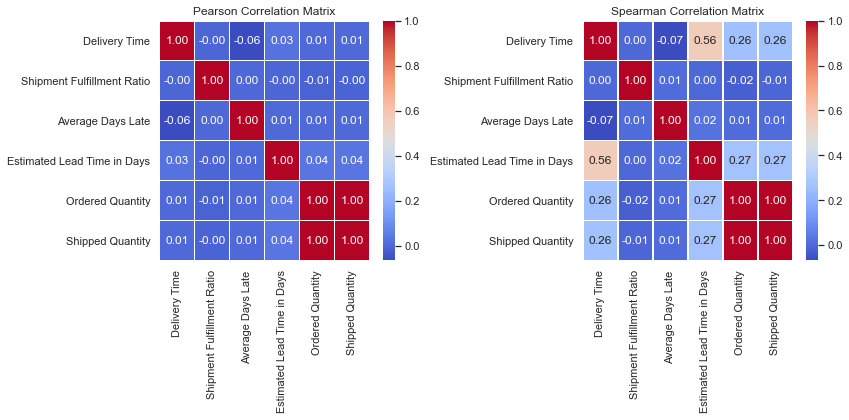

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pearson_corr and spearman_corr are already calculated

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize for better visuals

# Step 4: Plot Pearson correlation heatmap
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Pearson Correlation Matrix")

# Step 5: Plot Spearman correlation heatmap
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Spearman Correlation Matrix")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<Figure size 864x432 with 0 Axes>

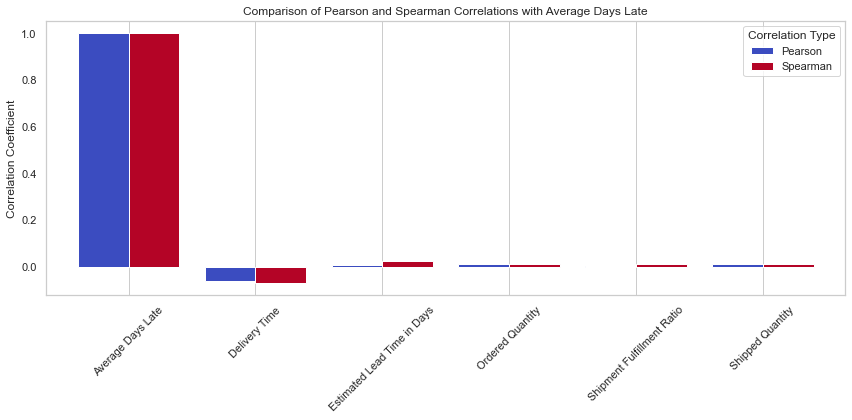

In [19]:
# Selecting the required columns for comparison 
target_variable = 'Average Days Late'  # Change this to 'Shipment Fulfillment Ratio' if needed

# Extracting Pearson and Spearman correlations for the target variable
pearson_selected = pearson_corr[target_variable].dropna().sort_values(ascending=False)
spearman_selected = spearman_corr[target_variable].dropna().sort_values(ascending=False)

# Combine into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Pearson': pearson_selected,
    'Spearman': spearman_selected
}).dropna()

# Select the top variables to visualize (e.g., top 10)
comparison_df = comparison_df.head(10)

# Plot a comparison bar graph
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', width=0.8, colormap='coolwarm', figsize=(12, 6))
plt.title(f"Comparison of Pearson and Spearman Correlations with {target_variable}")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Correlation Type")
plt.tight_layout()
plt.show()

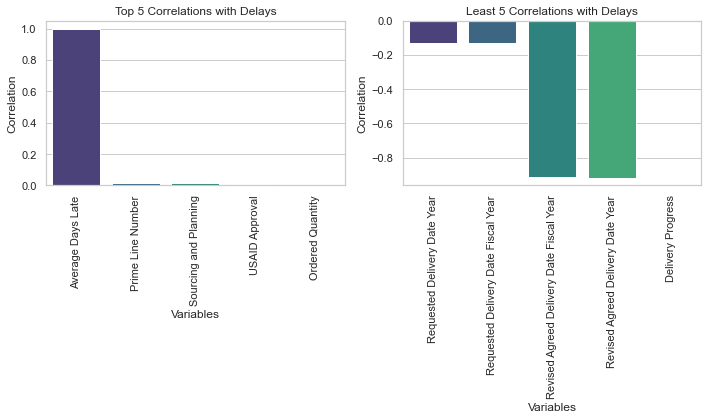

In [20]:
# Filter only numerical columns from the dataset
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Define the relevant variables that we need
delay_variable = 'Average Days Late'
fulfillment_variables = ['Ordered Quantity', 'Shipped Quantity']

if delay_variable not in numerical_data.columns:
    print(f"'{delay_variable}' not found in numerical columns. Check dataset structure.")
if not all(var in numerical_data.columns for var in fulfillment_variables):
    print(f"One or more fulfillment variables not found in numerical columns. Check dataset structure.")

# Calculating the correlations for delays
correlation_with_delay = numerical_data.corr()[delay_variable].sort_values(ascending=False)

# Calculating average correlations for fulfillment
correlation_with_fulfillment = numerical_data.corr()[fulfillment_variables].mean(axis=1).sort_values(ascending=False)

# Extracting the greatest and least correlations for delays
top_delay_corr = correlation_with_delay.head(5)
least_delay_corr = correlation_with_delay.tail(5)

# Extracting the greatest and least correlations for fulfillment
top_fulfillment_corr = correlation_with_fulfillment.head(5)
least_fulfillment_corr = correlation_with_fulfillment.tail(5)

# Visualizing of the results
plt.figure(figsize=(10,6))

# Bar Graph Plot for delay correlations
plt.subplot(1, 2, 1)
sns.barplot(x=top_delay_corr.index, y=top_delay_corr.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 5 Correlations with Delays")
plt.ylabel("Correlation")
plt.xlabel("Variables")

plt.subplot(1, 2, 2)
sns.barplot(x=least_delay_corr.index, y=least_delay_corr.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Least 5 Correlations with Delays")
plt.ylabel("Correlation")
plt.xlabel("Variables")

plt.tight_layout()
plt.show()



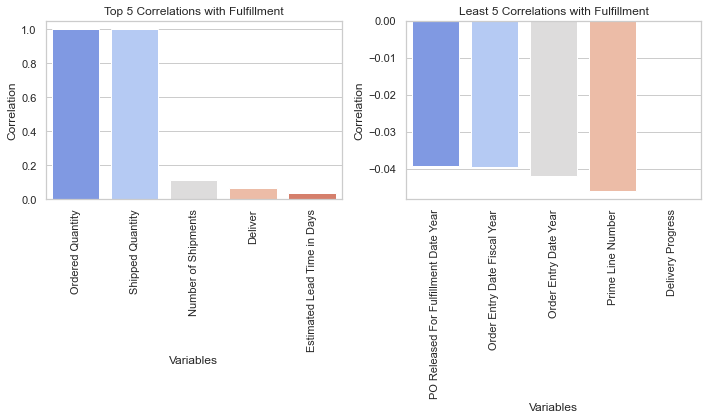

In [21]:
plt.figure(figsize=(10,6))

# Bar Graph Plot for fulfillment correlations
plt.subplot(1, 2, 1)
sns.barplot(x=top_fulfillment_corr.index, y=top_fulfillment_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 5 Correlations with Fulfillment")
plt.ylabel("Correlation")
plt.xlabel("Variables")

plt.subplot(1, 2, 2)
sns.barplot(x=least_fulfillment_corr.index, y=least_fulfillment_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Least 5 Correlations with Fulfillment")
plt.ylabel("Correlation")
plt.xlabel("Variables")

plt.tight_layout()
plt.show()

# Analysis Summary

We observed the following from the correlation analysis performed with the USAID Dataset

## **Variables with the Greatest Correlation**

### **Delays (`Average Days Late`)**
- **Positive Correlations**:
  1. **Sourcing and Planning**: (0.016)
  2. **Prime Line Number**: (0.014)
  3. **Pick Up**: (0.014)

- **Negative Correlations**:
  1. **Revised Agreed Delivery Date Year**: (-0.916)
  2. **Revised Agreed Delivery Date Fiscal Year**: (-0.915)
  3. **Requested Delivery Date Fiscal Year**: (-0.132)

### **Fulfillment (`Ordered Quantity` and `Shipped Quantity`)**
- **Positive Correlations**:
  1. **Ordered Quantity and Shipped Quantity**: (0.999)  
     _(Expected as they directly measure fulfillment.)_
  2. **Number of Shipments**: (0.117)
  3. **Estimated Lead Time in Days**: (0.096)

- **Negative Correlations**:
  1. **Process PO/DO**: (-0.041)
  2. **Order Entry Date Year**: (-0.042)
  3. **Prime Line Number**: (-0.046)

---

## **Variables with the Least Correlation**

### **Delays**
- **Weak Positive Correlations**:
  1. **USAID Approval**: (0.012)
  2. **Manufacture**: (0.005)

### **Fulfillment**
- **Weak Correlations**:
  1. **Sourcing and Planning**: (0.070)
  2. **Order Cycle Time**: (-0.005)

---

## **Insights**
- **Revised Agreed Delivery Date** is the strongest negative predictor of delays, suggesting that revisions to the delivery date significantly affect the timeline.  
- **Ordered Quantity** and **Shipped Quantity** strongly correlate with fulfillment, as expected.  
- Variables like **USAID Approval** and **Manufacture** have negligible impacts on delays.  
- **Order Cycle Time** barely influences fulfillment outcomes.

In [22]:
print(data_cleaned.columns)

Index(['ROPOLine', 'Task Order', 'Condom Adjusted Task Order', 'Country',
       'RO Number', 'PO DO IO Number', 'Order Number', 'Prime Line Number',
       'Status Name', 'TLP Indicator', 'Order Type', 'Fulfillment Method',
       'Transportation Mode', 'Item Tracer Category', 'Product Category',
       'Product ID', 'Product_Name', 'UOM', 'Base Unit',
       'Base Unit Multiplier', 'Framework Contract', 'D365 Health Element',
       'D365 Funding Source', 'D365 Funding Source Detail',
       'Fiscal_Year_Funding', 'Estimated Lead Time in Days', 'Vendor Incoterm',
       'Destination Incoterm', 'Illustrative Price', 'Ordered Quantity',
       'Shipped Quantity', 'In Full (IFD)', 'On Time (OTD)',
       'Between -14 and 14', 'Between -30 and 30', 'OTIF Categories',
       'OTIF Between -14 and 14', 'OTIF Between -30 and 30',
       'Average Days Late', 'Number of Shipments', 'Delivery Progress',
       'Line Delivery Status', 'Agreed Delivery Date',
       'Agreed Delivery Date Year', 

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure your dataframe 'data_cleaned' is loaded
# Select relevant numeric columns for correlation analysis
relevant_columns = ['Ordered Quantity', 'Shipped Quantity', 'Average Days Late',
                    'Estimated Lead Time in Days', 'Shipment Fulfillment Ratio']

numeric_data = data_cleaned[relevant_columns]

# Pearson correlation matrix
pearson_corr = numeric_data.corr(method='pearson')

# Spearman correlation matrix
spearman_corr = numeric_data.corr(method='spearman')


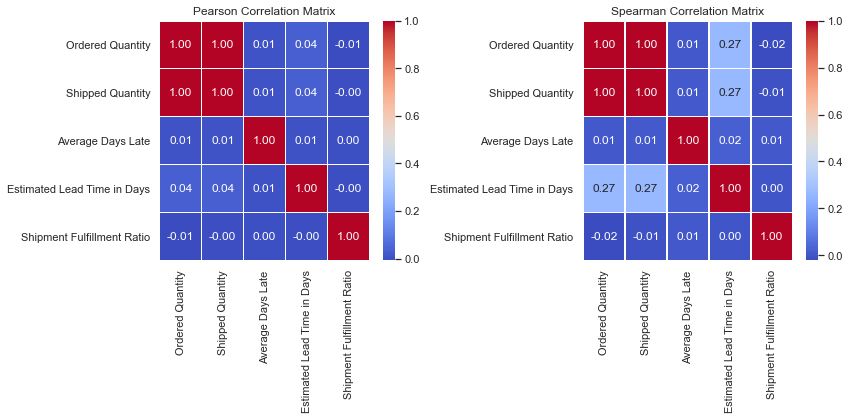

In [24]:
# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize for better visuals

# Step 4: Plot Pearson correlation heatmap
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Pearson Correlation Matrix")

# Step 5: Plot Spearman correlation heatmap
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Spearman Correlation Matrix")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


NameError: name 'pearson_corr_outlier' is not defined

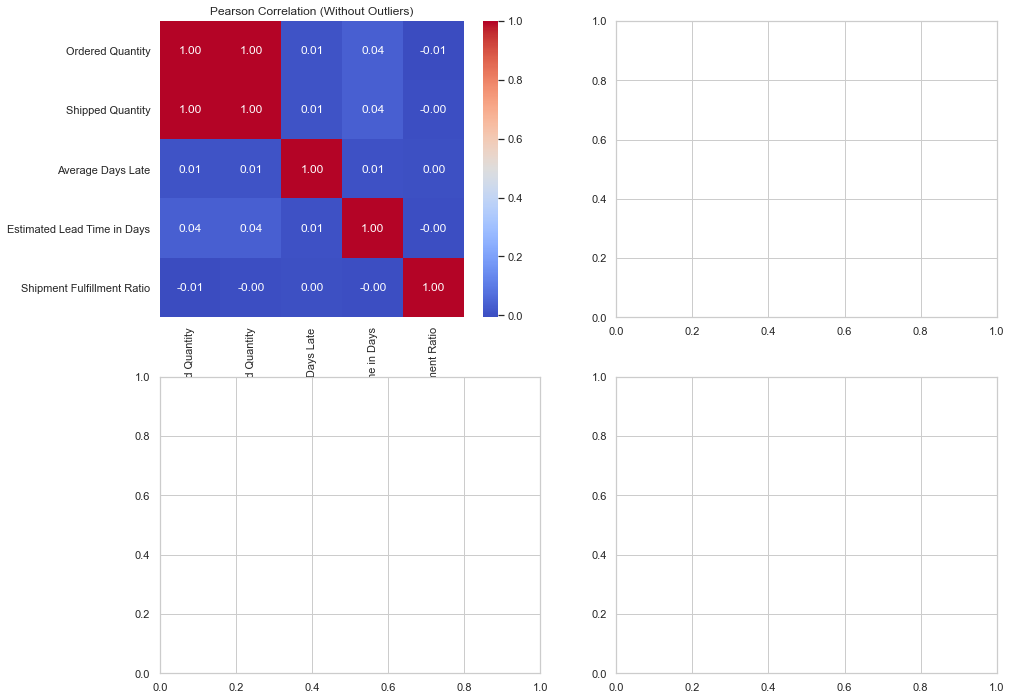

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create side-by-side heatmaps for Pearson and Spearman correlations

# Initialize the figure
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Pearson without outliers
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0, 0])
axes[0, 0].set_title('Pearson Correlation (Without Outliers)')

# Pearson with outliers
sns.heatmap(pearson_corr_outlier, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0, 1])
axes[0, 1].set_title('Pearson Correlation (With Outliers)')

# Spearman without outliers
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1, 0])
axes[1, 0].set_title('Spearman Correlation (Without Outliers)')

# Spearman with outliers
sns.heatmap(spearman_corr_outlier, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1, 1])
axes[1, 1].set_title('Spearman Correlation (With Outliers)')

# Adjust layout
plt.tight_layout()
plt.show()


In [27]:
# Example: Compare correlations for 'Ordered Quantity' and 'Shipped Quantity'
print("Pearson Correlation (Without Outlier):", pearson_corr.loc['Ordered Quantity', 'Shipped Quantity'])
print("Spearman Correlation (Without Outlier):", spearman_corr.loc['Ordered Quantity', 'Shipped Quantity'])

print("Pearson Correlation (With Outlier):", pearson_corr_outlier.loc['Ordered Quantity', 'Shipped Quantity'])
print("Spearman Correlation (With Outlier):", spearman_corr_outlier.loc['Ordered Quantity', 'Shipped Quantity'])


Pearson Correlation (Without Outlier): 0.9996039636375027
Spearman Correlation (Without Outlier): 0.9996585862986288


NameError: name 'pearson_corr_outlier' is not defined

In [ ]:
from scipy.stats import pearsonr, spearmanr

# Example: Correlation significance for 'Ordered Quantity' and 'Shipped Quantity'
pearson_corr_value, pearson_p = pearsonr(data_cleaned['Ordered Quantity'], data_cleaned['Shipped Quantity'])
spearman_corr_value, spearman_p = spearmanr(data_cleaned['Ordered Quantity'], data_cleaned['Shipped Quantity'])

print(f"Pearson Correlation: {pearson_corr_value}, P-value: {pearson_p}")
print(f"Spearman Correlation: {spearman_corr_value}, P-value: {spearman_p}")


In [ ]:
# Correlation of Shipment Fulfillment Ratio and Average Days Late with other variables
shipment_fulfillment_corr = numeric_data.corrwith(numeric_data['Shipment Fulfillment Ratio'])
average_days_late_corr = numeric_data.corrwith(numeric_data['Average Days Late'])

# Display results
print("Correlation with Shipment Fulfillment Ratio:")
print(shipment_fulfillment_corr)

print("\nCorrelation with Average Days Late:")
print(average_days_late_corr)


In [ ]:
# Sort correlations
print("Variables most correlated with Shipment Fulfillment Ratio:")
print(shipment_fulfillment_corr.sort_values(ascending=False))

print("\nVariables least correlated with Average Days Late:")
print(average_days_late_corr.sort_values())


In [ ]:
import matplotlib.pyplot as plt

# Plot correlations for Shipment Fulfillment Ratio
shipment_fulfillment_corr.sort_values().plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title('Correlation with Shipment Fulfillment Ratio')
plt.xlabel('Correlation Coefficient')
plt.show()

# Plot correlations for Average Days Late
average_days_late_corr.sort_values().plot(kind='barh', figsize=(8, 6), color='salmon')
plt.title('Correlation with Average Days Late')
plt.xlabel('Correlation Coefficient')
plt.show()


In [ ]:
# Check for NaNs in the relevant columns
print("NaN values in Shipment Fulfillment Ratio:", numeric_data['Shipment Fulfillment Ratio'].isna().sum())
print("NaN values in Ordered Quantity:", numeric_data['Ordered Quantity'].isna().sum())

# Check for infinite values
print("Infinite values in Shipment Fulfillment Ratio:", numeric_data['Shipment Fulfillment Ratio'].isin([float('inf'), float('-inf')]).sum())
print("Infinite values in Ordered Quantity:", numeric_data['Ordered Quantity'].isin([float('inf'), float('-inf')]).sum())


# Replace infinite values with NaN
numeric_data = numeric_data.copy()  # Ensure it's a separate copy
numeric_data['Shipment Fulfillment Ratio'] = numeric_data['Shipment Fulfillment Ratio'].replace([float('inf'), float('-inf')], float('nan'))
numeric_data['Shipment Fulfillment Ratio'].fillna(numeric_data['Shipment Fulfillment Ratio'].mean(), inplace=True)


# Verify the column
print(numeric_data['Shipment Fulfillment Ratio'].isna().sum())  # Should be 0


In [ ]:
# Check for NaNs in the relevant columns
print("NaN values in Shipment Fulfillment Ratio:", numeric_data['Shipment Fulfillment Ratio'].isna().sum())
print("NaN values in Ordered Quantity:", numeric_data['Ordered Quantity'].isna().sum())

# Check for infinite values
print("Infinite values in Shipment Fulfillment Ratio:", numeric_data['Shipment Fulfillment Ratio'].isin([float('inf'), float('-inf')]).sum())
print("Infinite values in Ordered Quantity:", numeric_data['Ordered Quantity'].isin([float('inf'), float('-inf')]).sum())


In [ ]:
from scipy.stats import pearsonr, spearmanr

# Pearson and Spearman correlations using cleaned data
pearson_corr, pearson_p = pearsonr(numeric_data['Shipment Fulfillment Ratio'], numeric_data['Ordered Quantity'])
spearman_corr, spearman_p = spearmanr(numeric_data['Shipment Fulfillment Ratio'], numeric_data['Ordered Quantity'])

print("Pearson Correlation:", pearson_corr, "P-value:", pearson_p)
print("Spearman Correlation:", spearman_corr, "P-value:", spearman_p)


In [ ]:
for var in relevant_columns:
    if var != 'Shipment Fulfillment Ratio':  # Skip self-correlation
        pearson_corr, pearson_p = pearsonr(numeric_data['Shipment Fulfillment Ratio'], numeric_data[var])
        spearman_corr, spearman_p = spearmanr(numeric_data['Shipment Fulfillment Ratio'], numeric_data[var])
        print(f"{var}: Pearson Correlation = {pearson_corr:.3f}, p-value = {pearson_p:.3g}")
        print(f"{var}: Spearman Correlation = {spearman_corr:.3f}, p-value = {spearman_p:.3g}")

        

In [ ]:
# Compute the Pearson correlation matrix for all relevant columns
pearson_corr = numeric_data.corr(method='pearson')  # This gives a correlation matrix

import numpy as np

# Initialize the mask to hide insignificant correlations (False means "keep", True means "hide")
mask = np.zeros_like(pearson_corr, dtype=bool)

# Loop through each pair of variables to check the significance (using pearsonr)
for i, col in enumerate(pearson_corr.columns):
    for j, row in enumerate(pearson_corr.columns):
        if i != j:  # Skip the diagonal (self-correlation)
            _, p = pearsonr(numeric_data[col], numeric_data[row])  # Calculate p-value
            if p > 0.05:  # If p > 0.05, mark as insignificant
                mask[i, j] = True

# Now, plot the heatmap with the significance mask
plt.figure(figsize=(6, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, linewidths=0.5)
plt.title('Pearson Correlation with Significance Masked')
plt.show()


In [ ]:
# Compute the Spearman correlation matrix for all relevant columns
spearman_corr = numeric_data.corr(method='spearman')


# Pearson correlation between 'Shipment Fulfillment Ratio' and 'Ordered Quantity'
print("Pearson Correlation (Shipment Fulfillment Ratio vs Ordered Quantity):", pearson_corr.loc['Shipment Fulfillment Ratio', 'Ordered Quantity'])

# Spearman correlation between 'Shipment Fulfillment Ratio' and 'Ordered Quantity'
print("Spearman Correlation (Shipment Fulfillment Ratio vs Ordered Quantity):", spearman_corr.loc['Shipment Fulfillment Ratio', 'Ordered Quantity'])


In [ ]:
# Correlations for other variables with Shipment Fulfillment Ratio and Average Days Late
other_shipment_corr = numeric_data.corrwith(numeric_data['Shipment Fulfillment Ratio'])
other_delay_corr = numeric_data.corrwith(numeric_data['Average Days Late'])

# Print results for better understanding
print("Correlation with Shipment Fulfillment Ratio:")
print(other_shipment_corr)

print("\nCorrelation with Average Days Late:")
print(other_delay_corr)

print("Variables most correlated with Shipment Fulfillment Ratio:")
print(other_shipment_corr.sort_values(ascending=False))

print("\nVariables least correlated with Average Days Late:")
print(other_delay_corr.sort_values())

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=numeric_data['Ordered Quantity'], y=numeric_data['Shipment Fulfillment Ratio'])
plt.title('Shipment Fulfillment Ratio vs Ordered Quantity')
plt.xlabel('Ordered Quantity')
plt.ylabel('Shipment Fulfillment Ratio')
plt.show()

# Bar plot for correlations with Shipment Fulfillment Ratio
other_shipment_corr.sort_values().plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title('Correlation with Shipment Fulfillment Ratio')
plt.xlabel('Correlation Coefficient')
plt.show()

from scipy.stats import pearsonr, spearmanr

# Pearson and Spearman correlation with p-values
pearson_corr_value, pearson_p = pearsonr(numeric_data['Average Days Late'], numeric_data['Shipment Fulfillment Ratio'])
spearman_corr_value, spearman_p = spearmanr(numeric_data['Average Days Late'], numeric_data['Shipment Fulfillment Ratio'])

print(f"Pearson Correlation: {pearson_corr_value}, P-value: {pearson_p}")
print(f"Spearman Correlation: {spearman_corr_value}, P-value: {spearman_p}")
